<a id='BacktoTop'></a>
# Lab One: Visualization and Data Preprocessing
## MSDS 7331: Data Mining
## Dr. Drew
## Group 3: Shanqing Gu, Manisha Pednekar, Dmitry Andreev and Jonathan Knowles

*Analysis of Online News Popularity Dataset (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity):  explore the statistical summaries of the features, visualize the attributes, and make conclusions from the visualizations and analysis*


## Table of Contents
1. [Business Understanding](#BusinessUnderstanding)
2. [Data Mining Type](#DataMiningType)
3. [Data Quality](#DataQuality)
4. [Simple Statistics](#SimpleStatistics)
5. [Visualize Attributes](#VisualizeAttributes)
6. [Explore Joint Relationships](#ExploreJointAttributes)
7. [Explore Attributes and Class](#ExploreAttributesandClass)
8. [New Features](#NewFeatures)
9. [Exceptional Work](#ExceptionalWork)

<a id='BusinessUnderstanding'></a>
### 01. Business Understanding
[Back to top](#BacktoTop)

#### Section Objective:
Describe the purpose of the dataset you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific *


##### Purpose of this dataset
This Online News Popularity Dataset was acquisited from [Mashable](https://mashable.com), a popular news and opinion website that focuses on social media and technology.

The dataset is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

The data consists of 39,644 records with 61 attributes that provide details and meta-data about online news articles that were published by Mashable over a two year period ranging 2013 - 2015. The goal of collecting this data was to predict the popularity of a news article. Popularity in this case is defined as the number of times that the article is shared across all social media platforms.


##### Defining and measuring outcomes of this dataset
Our group would like to create a classification model that can determine if an article will be popular based on the amount of times it is shared on social media. We have determined that an article can be classified as popular if it is shared 1,400 number of times. The model will have a binary output: popular / not popular. 

We chose not to predict the actual number of shares that an article will have once published since that would require complex machine learning algorithms that are outside the scope of this lab assignment. In addition, if the accuracy of the prediction model is low then it could potentially provide publishers with false hope such as predicting that their article will have 1,000 shares but in reality it only yields 10 shares. Whereas the binary output doesn't promise something unrealistic but simply tells the author whether the article surpasses the chosen cutoff value of 1,400 shares.

##### Why is this data important?
This data is important because it can be used to help Mashable and other online publishers understand the factors that play a part in how popular their articles are.  With a reliable model for predicting popularity Mashable will understand how they can design articles to achieve maximum popularity and exposure, which is the key objective of any publishing company.


##### How will we measure the effectiveness of our alogrithm? 
We will measure the effectiveness of our alorithm by the accuracy of its classification. We feel that a model that achieves a success rate of 73% would qualify as an effective model. This success rate is based on the study carried out by K. Fernandes et al. that outlines the initial data colleciton, pre-processing, and prediction models for this data set.

##### Importing Python Libraries 

To keep this Jupyter notebook organized, we decided to import the necessary Python libraries all together at the beginning rather than doing so separately as we move through each section. The following libraries will be used for this lab assignment:

* pandas for data manipulation
* numpy for multidimensional array computing
* matplotlib.pyplot and Seaborn for data visualization
* %matplotlib inline to include plots within the notebook

In [1]:
# Import general libraries which will be uses for this Lab_01 project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='DataMiningType'></a>
### 02. Data Mining Type
[Back to top](#BacktoTop)

#### Section Objective:
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 


#### Removing non-predictive Attributes
In the code below we import the data set starting with the 3rd variable as the first two variables were non-predictive and will not help in our analysis.

Those variables were:
1. URL - actual url of the article
2. Timedelta - amount of time from when the article was posted to when data was collected

In [2]:
# Read csv file
df = pd.read_csv("OnlineNewsPopularity.csv") 

# Exclude url and timedelta columns, read from n_tokens_title
df = df.loc[:, ' n_tokens_title':]

dfCopy = df.copy() # dfCopy.info() # use df.tail() to read from the bottom

#### Data Description
The code below generates a table of the variables remaining in the dataset. For each attribute we list:
1. Variable name
2. Type of data
3. Scale(min, mean, median and max)
4. Description.

In [3]:
from IPython.display import display, HTML

variables_description = [
[' n_tokens_title', 'ratio', 'TBD', 'Number of words in the title']
,[' n_tokens_content', 'ratio', 'TBD', 'Number of words in the content 0-8500 ']
,[' n_unique_tokens', 'ratio', 'TBD', 'Rate of unique words in the content']
,[' n_non_stop_words', 'ratio', 'TBD', 'Rate of non-stop words in the content']
,[' n_non_stop_unique_tokens', 'ratio', 'TBD', 'Rate of unique non-stop words in the content']
,[' num_hrefs', 'ratio', 'TBD', 'Number of links']
,[' num_self_hrefs', 'ratio', 'TBD', 'Number of links to other articles published by Mashable']
,[' num_imgs', 'ratio', 'TBD', 'Number of images']
,[' num_videos', 'ratio', 'TBD', 'Number of videos']
,[' average_token_length', 'ratio', 'TBD', '(Binary) Average length of the words in the content']
,[' num_keywords', 'ratio', 'TBD', '(Binary) Number of keywords in the metadata']
,[' data_channel_is_lifestyle', 'nominal', 'TBD', '(Binary) Is data channel Lifestyle?']
,[' data_channel_is_entertainment', 'nominal', 'TBD', '(Binary) Is data channel Entertainment?']
,[' data_channel_is_bus', 'nominal', 'TBD', '(Binary) Is data channel Business?']
,[' data_channel_is_socmed', 'nominal', 'TBD', '(Binary) Is data channel Social Media? ']
,[' data_channel_is_tech', 'nominal', 'TBD', '(Binary) Is data channel Tech?']
,[' data_channel_is_world', 'nominal', 'TBD', '(Binary) Is data channel World?']
,[' kw_min_min', 'ratio', 'TBD', 'Worst keyword (min. shares)']
,[' kw_max_min', 'ratio', 'TBD', 'Worst keyword (max. shares)']
,[' kw_avg_min', 'ratio', 'TBD', 'Worst keyword (avg. shares)']
,[' kw_min_max', 'ratio', 'TBD', 'Best keyword (min. shares)']
,[' kw_max_max', 'ratio', 'TBD', 'Best keyword (max. shares)']
,[' kw_avg_max', 'ratio', 'TBD', 'Best keyword (avg. shares)']
,[' kw_min_avg', 'ratio', 'TBD', 'Avg. keyword (min. shares)']
,[' kw_max_avg', 'ratio', 'TBD', 'Avg. keyword (max. shares)']
,[' kw_avg_avg', 'ratio', 'TBD', 'Avg. keyword (avg. shares)']
,[' self_reference_min_shares', 'ratio', 'TBD', 'Min. shares of referenced articles in Mashable']
,[' self_reference_max_shares', 'ratio', 'TBD', 'Max. shares of referenced articles in Mashable']
,[' self_reference_avg_sharess', 'ratio', 'TBD', 'Error or the Zillow model response variable']
,[' weekday_is_monday', 'nominal', 'TBD', '(Binary) Was the article published on a Monday? ']
,[' weekday_is_tuesday', 'nominal', 'TBD', '(Binary) Was the article published on a Tuesday? ']
,[' weekday_is_wednesday', 'nominal', 'TBD', '(Binary) Was the article published on a Wednesday?']
,[' weekday_is_thursday', 'nominal', 'TBD', '(Binary) Was the article published on a Thursday?']
,[' weekday_is_friday', 'nominal', 'TBD', '(Binary) Was the article published on a Friday? ']
,[' weekday_is_saturday', 'nominal', 'TBD', '(Binary) Was the article published on a Saturday? ']
,[' weekday_is_sunday', 'nominal', 'TBD', '(Binary) Was the article published on a Sunday? ']
,[' is_weekend', 'nominal', 'TBD', '(Binary) Was the article published on the weekend?']
,[' LDA_00', 'ratio', 'TBD', 'Closeness to LDA topic 0']
,[' LDA_01', 'ratio', 'TBD', 'Closeness to LDA topic 1']
,[' LDA_02', 'ratio', 'TBD', 'Closeness to LDA topic 2']
,[' LDA_03', 'ratio', 'TBD', 'Closeness to LDA topic 3']
,[' LDA_04', 'ratio', 'TBD', 'Closeness to LDA topic 4 ']
,[' global_subjectivity', 'ratio', 'TBD', 'Text subjectivity']
,[' global_sentiment_polarity', 'ratio', 'TBD', 'Text sentiment polarity ']
,[' global_rate_positive_words', 'ratio', 'TBD', 'Rate of positive words in the content ']
,[' global_rate_negative_words', 'ratio', 'TBD', 'Rate of negative words in the content ']
,[' rate_positive_words', 'ratio', 'TBD', 'Rate of positive words among non-neutral tokens']
,[' rate_negative_words', 'ratio', 'TBD', 'Rate of negative words among non-neutral tokens']
,[' avg_positive_polarity', 'ratio', 'TBD', 'Avg. polarity of positive words ']
,[' min_positive_polarity', 'ratio', 'TBD', 'Min. polarity of positive words ']
,[' max_positive_polarity', 'ratio', 'TBD', 'Max. polarity of positive words ']
,[' avg_negative_polarity', 'ratio', 'TBD', 'Avg. polarity of negative words']
,[' min_negative_polarity', 'ratio', 'TBD', 'Min. polarity of negative words']
,[' max_negative_polarity', 'ratio', 'TBD', 'Max. polarity of negative words']
,[' title_subjectivity', 'ratio', 'TBD', 'Title subjectivity']    
,[' title_sentiment_polarity', 'ratio', 'TBD', 'Title polarity']
,[' abs_title_subjectivity', 'ratio', 'TBD', 'Absolute subjectivity level']
,[' abs_title_sentiment_polarity', 'ratio', 'TBD', 'Absolute polarity level']
,[' shares', 'ratio', 'TBD', 'Number of shares (target)']
]

variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')
variables = variables.loc[df.columns]

def output_variables_table(variables): #variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Description</th></tr>']
    for vname, atts in variables.iterrows():
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = df[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d, %d, %d)' % (df[vname].min(), df[vname].mean(), df[vname].median(), df[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

output_variables_table(variables)

Variable,Type,Scale,Description
n_tokens_title,ratio,"(2, 10, 10, 23)",Number of words in the title
n_tokens_content,ratio,"(0, 546, 409, 8474)",Number of words in the content 0-8500
n_unique_tokens,ratio,"(0, 0, 0, 701)",Rate of unique words in the content
n_non_stop_words,ratio,"(0, 0, 0, 1042)",Rate of non-stop words in the content
n_non_stop_unique_tokens,ratio,"(0, 0, 0, 650)",Rate of unique non-stop words in the content
num_hrefs,ratio,"(0, 10, 8, 304)",Number of links
num_self_hrefs,ratio,"(0, 3, 3, 116)",Number of links to other articles published by Mashable
num_imgs,ratio,"(0, 4, 1, 128)",Number of images
num_videos,ratio,"(0, 1, 0, 91)",Number of videos
average_token_length,ratio,"(0, 4, 4, 8)",(Binary) Average length of the words in the content


#### Check with df.info( ) and df.head( )

Concise summary of the dataset and quickly check if the data has the right type.

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39644 non-null float64
 data_channel_is_tech             39

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


##### Cleaning Up Attribute Names 

Every attribute in this dataset contains a space(" ") at the begining of its name, the code below will remove that extra space and make handling the dataset a little easier.

In [5]:
# Strip the empty space in varible names

df.columns = df.columns.str.replace(' ', '')

##### Consolidate related binary attributes into categorical attributes
###### Channel
In the code snippet below, the following attributes have been consolidated into a single attribute new "Channel":
1. data_channel_is_lifestyle
2. data_channel_is_entertainment
3. data_channel_is_bus
4. data_channel_is_socmed
5. data_channel_is_tech
6. data_channel_is_world

The consolidation makes sense because the new categorical variable will enable analysis to be performed groups by "Channel".
* This will remove some records that do not have a defined channel, but leaves us with plenty to carry on with our analysis, we will still have over 33K records

In [6]:
# Combine and make 'channel' with 6 data_channel variables

Lifestyle_df=df[df['data_channel_is_lifestyle']==1].copy()
Lifestyle_df['Channel']='Lifestyle'

Entertainment_df=df[df['data_channel_is_entertainment']==1].copy()
Entertainment_df['Channel']='Entertainment'

Bus_df=df[df['data_channel_is_bus']==1].copy()
Bus_df['Channel']='Bus'

Socmed_df=df[df['data_channel_is_socmed']==1].copy()
Socmed_df['Channel']='Socmedia'

Tech_df=df[df['data_channel_is_tech']==1].copy()
Tech_df['Channel']='Tech'

World_df=df[df['data_channel_is_world']==1].copy()
World_df['Channel']='World'

World_df=df[df['data_channel_is_world']==1].copy()
World_df['Channel']='World'

df=pd.concat([Lifestyle_df,Entertainment_df,Bus_df,Socmed_df,Tech_df,World_df],axis=0)

sum(df['Channel'].value_counts()) # Check if the sample size is the same as original 33,510

33510

###### Weekday
In the code snippet below the following attributes have been consolidated into a single attribute new "Weekday":
1. weekday_is_monday
2. weekday_is_tuesday
3. weekday_is_wednesday
4. weekday_is_thursday
5. weekday_is_friday
6. weekday_is_saturday
7. weekday_is_sunday

The consolidation makes sense because the new gategorical variable will enable analysis to be performed groups by "Weekday".

In [7]:
# Combine and make 'Weekday' with 7 weekday variables

Monday_df=df[df['weekday_is_monday']==1].copy()
Monday_df['Weekday']='Monday'

Tuesday_df=df[df['weekday_is_tuesday']==1].copy()
Tuesday_df['Weekday']='Tuesday'

Wednesday_df=df[df['weekday_is_wednesday']==1].copy()
Wednesday_df['Weekday']='Wednesday'

Thursday_df=df[df['weekday_is_thursday']==1].copy()
Thursday_df['Weekday']='Thursday'

Friday_df=df[df['weekday_is_friday']==1].copy()
Friday_df['Weekday']='Friday'

Saturday_df=df[df['weekday_is_saturday']==1].copy()
Saturday_df['Weekday']='Saturday'

Sunday_df=df[df['weekday_is_sunday']==1].copy()
Sunday_df['Weekday']='Sunday'

df=pd.concat([Monday_df,Tuesday_df,Wednesday_df,Thursday_df,Friday_df,Saturday_df,Sunday_df],axis=0)

sum(df['Weekday'].value_counts()) # Check if the sample size is the same as original 33,510

33510

In [8]:
# Check column locations and prepare to drop
df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]]

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],
      dtype='object')

In [9]:
# Remove previous channel and weekly columns as mentioned above
df.drop(df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]], axis=1, inplace=True)

<a id='DataQuality'></a>
### 03. Data Quality

#### Section Objective:
Verify data quality: 
1. Explain any missing values, duplicate data, and outliers. Are those mistakes?
    1. To verify the quality of this dataset we will:
        1. [Look for the presence of null values](#CheckForNullValues)
        2. [Look for duplicated records](#CheckForDuplicateRecords)
        3. [Look for outliers](#CheckForOutliers)

<a id='CheckForNullValues'></a>
##### Checking for Null Values
[Back to data quality](#BacktoDataQuality)

To perform a check for null values in a dataset the *isnull* function from the *pandas* package can be used.

As shown in the code snippet below, there are no null values in this dataset. 

In [10]:
# No Missing values in this dataset
pd.isnull(df).sum()

n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
LDA_00                          0
LDA_01                          0
LDA_02                          0
LDA_03                          0
LDA_04                          0
global_subjectivity             0
global_sentime

<a id='CheckForDuplicateRecords'></a>
##### Checking for Duplicate Records
[Back to data quality](#BacktoDataQuality)

To perform a check for duplicate records in a dataset the *dataframe.duplicated* function from the *pandas* package can be used.

As shown in the code snippet below, there are no duplicated records in this dataset. 

In [11]:
# No duplicated values in this dataset

df[df.duplicated(keep=False)]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Channel,Weekday


<a id='CheckForDuplicateRecords'></a>
##### Quick check of the data
[Back to data quality](#BacktoDataQuality)

To perform a quick check for the presence of outliers and distribution in a dataset the *dataframe.describe* function from the *pandas* package can be used.

As shown in the code snippet below, some attributes in the dataset have wide and skewed distribution, and log transformation should be performed for good data quality.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,33510.0,10.416204,2.134557,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,33510.0,585.438317,483.838530,0.000000,272.000000,447.000000,761.000000,8474.000000
n_unique_tokens,33510.0,0.549702,3.828350,0.000000,0.467396,0.532596,0.600000,701.000000
n_non_stop_words,33510.0,1.015010,5.688218,0.000000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,33510.0,0.699134,3.549460,0.000000,0.628370,0.690411,0.752475,650.000000
num_hrefs,33510.0,10.380603,10.599809,0.000000,4.000000,7.000000,13.000000,304.000000
num_self_hrefs,33510.0,3.368517,3.883522,0.000000,1.000000,3.000000,4.000000,116.000000
num_imgs,33510.0,3.959445,7.725860,0.000000,1.000000,1.000000,3.000000,128.000000
num_videos,33510.0,0.998448,3.651955,0.000000,0.000000,0.000000,1.000000,75.000000
average_token_length,33510.0,4.607736,0.646702,0.000000,4.490385,4.669471,4.852841,7.695652


<a id='CheckForOutliers'></a>
##### Perform log transformation for the chosen variables
[Back to data quality](#BacktoDataQuality)

For the log transformation, we follow severlrules to choose varaibles. For example, the "max" value is 10-fold larger than "50% value", and add a fixed value (e.g. 2) for negative values. The log transformed dataset is checked by df.dtypes and df.shape (with sample size 33,510 and 47 variables).

As shown in the section 04: Simple Statistics, the min and max values for each attribute in the dataset fall into a reasonable range and do not indicate the presence of any outliers that will impact the effectiveness of the classification model.

In [13]:
# Outliers will be handled by log transformation due to the sample numbers are more than 35k
# Find which variables need to make log transformation 

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1) # max > 10*50% value and max>1
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0) # Need add 2 when min <0

df_T["scale"] = "" # make new variable 'scale' in df_T

df_T.loc[df_T["log"],"scale"] = "log" # show 'log'
df_T.loc[df_T["log+2"],"scale"] = "log+2" # show 'log+2'

df_T[["mean", "min", "50%", "max", "scale"]] # show mean, min, 50%, max, scale

,mean,min,50%,max,scale
n_tokens_title,10.416204,2.000000,10.000000,23.000000,
n_tokens_content,585.438317,0.000000,447.000000,8474.000000,log
n_unique_tokens,0.549702,0.000000,0.532596,701.000000,log
n_non_stop_words,1.015010,0.000000,1.000000,1042.000000,log
n_non_stop_unique_tokens,0.699134,0.000000,0.690411,650.000000,log
num_hrefs,10.380603,0.000000,7.000000,304.000000,log
num_self_hrefs,3.368517,0.000000,3.000000,116.000000,log
num_imgs,3.959445,0.000000,1.000000,128.000000,log
num_videos,0.998448,0.000000,0.000000,75.000000,log
average_token_length,4.607736,0.000000,4.669471,7.695652,


In [14]:
# Log transform 18 variables

df['log_n_tokens_content'] = np.log(df['n_tokens_content'] + 0.1) # Add 0.1 to prevent infinity, same as below
df['log_n_unique_tokens'] = np.log(df['n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df['n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df['n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df['num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df['num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df['num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df['num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df['kw_min_min'] + 2) # Add 2 for "log+2' to prevent infinity, same as below
df['log_kw_max_min'] = np.log(df['kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df['kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df['kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df['kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df['kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df['self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df['self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_sharess'] = np.log(df['self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df['shares'] + 0.1)

In [15]:
# find locations for corresponding untransformed columns

df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]]

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'shares'],
      dtype='object')

In [16]:
# Drop the above columns

df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]], axis=1, inplace=True)

In [17]:
# Check if everything correct so far
df.dtypes

n_tokens_title                    float64
average_token_length              float64
num_keywords                      float64
kw_max_max                        float64
kw_avg_max                        float64
kw_min_avg                        float64
LDA_00                            float64
LDA_01                            float64
LDA_02                            float64
LDA_03                            float64
LDA_04                            float64
global_subjectivity               float64
global_sentiment_polarity         float64
global_rate_positive_words        float64
global_rate_negative_words        float64
rate_positive_words               float64
rate_negative_words               float64
avg_positive_polarity             float64
min_positive_polarity             float64
max_positive_polarity             float64
avg_negative_polarity             float64
min_negative_polarity             float64
max_negative_polarity             float64
title_subjectivity                

In [18]:
# Check data shape
df.shape

(33510, 47)

<a id='SimpleStatistics'></a>
### 04. Simple Statistics
[Back to top](#BacktoTop)

#### Section Objective:
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. 
* Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful

In [19]:
# Option to view all the avialable columns, default = 40
pd.options.display.max_columns = 59
# Quick statistic summary of the original data set
dfCopy.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

#### Shares:
With the goal of classifying whether an article is popular based on the number of shares, it seemed logical to start with that attribute. You will have to scroll right all the way to the end of the table above to find the **shares** attribute.

First thing that stands out right away is the large range with some articles only getting 1 single share while the maximum number of shares comes in at 690,400 shares. To get a better idea where the majority of articles can be expected with respect to shares, we look at the 25% percentile with 930 shares and the 75% percentile with 2,500 shares. Clearly, this looks like a heavily right skewed distribution which is futher confirmed by the mean number of shares at 2,929 being higher than the median at 1,400 shares suggesting that the mean is being heavily influenced by outliers on the high end of the scale.

To illustrate the extent of the right skewness and the need for a log transformation to better interpret the distribution, we have included the histogram and boxplots below. This serves as a visual check for outliers that might not have been dealt with in the **Data Quality** section which in turn could improve the prediction accuracy for any classification algorithm used for this data set.

Text(0.5,0,'Number of shares')

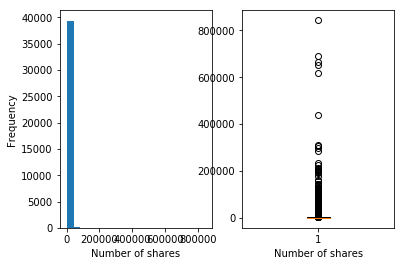

In [20]:
# histogram of untransformed shares attribute
plt.subplot(1, 2, 1)
plt.hist(dfCopy[' shares'], bins = 20)
plt.xlabel('Number of shares')
plt.ylabel('Frequency')

# boxplot of untransformed shares attribute
plt.subplot(1, 2, 2)
plt.boxplot(dfCopy[' shares'])
plt.xlabel('Number of shares')

Text(0.5,0,'Log Shares')

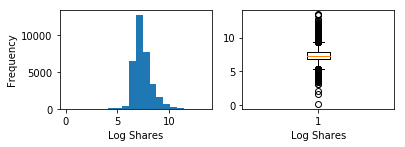

In [21]:
# histogram of log transformed shares attribute
plt.subplot(2, 2, 1)
plt.hist(df['log_shares'], bins = 20)
plt.xlabel('Log Shares')
plt.ylabel('Frequency')

# boxplot of log transformed shares attribute
plt.subplot(2, 2, 2)
plt.boxplot(df['log_shares'])
plt.xlabel('Log Shares')

We already pointed out that the median number of shares is 1,400. Calculation below is to see what the corresponding median value will be for the log transformed shares attribute.

In [22]:
df[['log_shares']].median()

log_shares    7.244299
dtype: float64

We will use this median value as the cutoff between popular and unpopular articles in our classification model. This classification will be stored in a newly created attribute labeled '*popular*'.

In [23]:
df['popular'] = np.where(df['log_shares'] >= 7.244299, True, False)

Looking through the **`describe`** summary statistics table, we noticed multiple attributes that have similar labels and seem to represent the same measure. The screenshot below from a [Stanford](http://cs229.stanford.edu/proj2015/328_report.pdf) study provides an organized grouping of similar attributes by the aspect of the article that it relates to. For example, the digital media aspect of the article is described by the number of images (*num_imgs*) and videos (*num_videos*) attributes.

We decided to discuss the important summary statistics of these aspects rather than go through the individual attributes one by one.

<img src="Features_Summary_Table.png">

#### Words:

Looking at the statistics summary table, it didn't surprise us that the titles for these articles are kept short. The mean title word count is just over 10 words with a tight standard deviation of 2 words because publishers know that today's readers would easily lose interest before even opening the article just based off a long title.

Going through the body of the article, there are several specific measures of the rate and type of words used as listed in the screenshot above under the **words** section. 

The attribute that comes to mind as the most important with regards to popularity is number of words in the article (*n_tokens_content*). The mean word count in this data set is 585 which seems short enough to hold the readers' attention for the full article and have a higher chance of sharing it. However, a 2013 study conducted by [Newswhip Analytics](https://www.newswhip.com/2013/12/article-length/) showed that articles in the 500 - 800 word count had the lowest chance of social media success which is why some news websites such as [Quartz](https://qz.com/) decided not to publish articles within that range.  Considering the standard deviation of almost 484 words and max word count of 8474, there are plenty of articles that fall out of that range. Lastly, the minimum word count of 0 initially got our attention  as possible outliers but upon closer inspection we found that these articles consisted only of images and videos.

After performing an extensive search, we didn't find any literature to compare with regards to rate of non-stop words (*n_non_stop_words*), rate of unique words (*n_unique_tokens*), and rate of unique non-stop words (*n_non_stop_unique_tokens*). Thus, the simple statistics for these attributes didn't seem as pertinent to review.

#### Links:¶
It would seem that including a lot of links within an article would easily distract a reader but surprisingly for this data set the mean number of links per article is just over 10. Upon closer examination, the 50% percentile corresponds to 7 links per article with the maximum coming in at an enormous 304 links so there is definitely some right skewness in the distribution.

There is an attribute measuring the number of Mashable article links (num_self_hrefs) per article. The mean number of Mashable links comes in at 3 per article which is lower than the mean of 10 total links discussed in the paragraph above. This seems reasonable since an article that only includes Mashable links might look like a self-promotion strategy for the website and lower the article's credbility.

#### Digital Media:

The mean number of images (*num_imgs*) and videos (*num_videos*) per article is ~ 4 and 1 respectively. This seems reasonable that articles would have at least a few pictures and videos to break up large text paragraphs in an effort to hold the readers' attention. 

Looking at the minimum values, it is interesting to see that there are still articles with neither any images or videos included which we believe would not be considered popular on social media. On the other end of the spectrum, the max values of 128 images and 75 videos are pretty extreme and we would imagine most readers would not have the attention span to get through such an article in its entirety. 

#### Summary of Simple Statistics After Log Transformations

From the data description as shown below, we can see all variables have the same sample size 33,510, indicating the proper data management with log transformation. The values (mean, std, min, 25%, 50%, 75% and max) for each attribute in the dataset show approximately normal distribution and reasonable standard deviations. This observation can further be confirmed with histogram for representative varaibles (see bellow at this section end). Further statistical anylysis can be performed with this dataset.

In [24]:
# Quick statistic summary of the transformed data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,33510.0,10.416204,2.134557,2.000000,9.000000,10.000000,12.000000,23.000000
average_token_length,33510.0,4.607736,0.646702,0.000000,4.490385,4.669471,4.852841,7.695652
num_keywords,33510.0,7.177798,1.952422,1.000000,6.000000,7.000000,9.000000,10.000000
kw_max_max,33510.0,753337.156073,213034.725810,0.000000,843300.000000,843300.000000,843300.000000,843300.000000
kw_avg_max,33510.0,241773.119564,122864.851517,0.000000,165789.285715,228286.666666,310000.000000,843300.000000
kw_min_avg,33510.0,1031.643292,1067.121534,-1.000000,0.000000,956.466667,1936.365694,3610.124972
LDA_00,33510.0,0.207364,0.277868,0.000000,0.025188,0.040000,0.320122,0.926994
LDA_01,33510.0,0.141303,0.224786,0.000000,0.025005,0.033339,0.134308,0.925947
LDA_02,33510.0,0.245294,0.295739,0.000000,0.028573,0.050001,0.432298,0.919999
LDA_03,33510.0,0.140653,0.224266,0.000000,0.025033,0.033373,0.136139,0.925542


#### Linear Regression 

We can use linear regression to check which variables are nearly significant with the target variable "Log_share".

In [25]:
# Pioneer Linear Regression analysis with numerical variables
class_y = df.log_shares
class_X = df.drop(['log_shares', 'Channel', 'Weekday'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
class_X = sm.add_constant(class_X)
ls_model = sm.OLS(class_y.astype(float), class_X.astype(float)).fit()
ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     969.9
Date:                Mon, 17 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:41:33   Log-Likelihood:                -29149.
No. Observations:               33510   AIC:                         5.839e+04
Df Residuals:                   33464   BIC:                         5.878e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              5.6047      1.157      4.845      0.000       3.337       7.872
n_tokens_title                     0.0035      0.002      2.265      0.024       0.000       0.007
average_token_length              -0.0424      0.014     -2.938      0.003      -0.071      -0.014
num_keywords                       0.0046      0.002      2.190      0.029       0.000       0.009
kw_max_max                      2.453e-08   2.87e-08      0.855      0.393   -3.17e-08    8.08e-08
kw_avg_max                     -5.185e-08    4.5e-08     -1.152      0.249    -1.4e-07    3.64e-08
kw_min_avg                       9.61e-05   8.32e-06     11.544      0.000    7.98e-05       0.000
LDA_00                             0.9619      1.444      0.666      0.505      -1.869       3.793
LDA_01                             0.9304      1.444      0.644      0.519      -1.901       3.761
LDA_02                             0.8889      1.445      0.615      0.538      -1.943       3.721
LDA_03                             0.9399      1.444      0.651      0.515      -1.891       3.770
LDA_04                             0.9538      1.444      0.660      0.509      -1.877       3.784
global_subjectivity                0.1132      0.048      2.338      0.019       0.018       0.208
global_sentiment_polarity         -0.0735      0.099     -0.739      0.460      -0.269       0.121
global_rate_positive_words         0.1336      0.419      0.319      0.750      -0.688       0.955
global_rate_negative_words        -0.2353      0.824     -0.286      0.775      -1.850       1.379
rate_positive_words               -0.0856      0.335     -0.255      0.798      -0.743       0.571
rate_negative_words               -0.1053      0.338     -0.312      0.755      -0.767       0.557
avg_positive_polarity              0.0329      0.077      0.425      0.671      -0.119       0.184
min_positive_polarity             -0.0943      0.067     -1.405      0.160      -0.226       0.037
max_positive_polarity             -0.0252      0.024     -1.057      0.291      -0.072       0.022
avg_negative_polarity             -0.0735      0.069     -1.065      0.287      -0.209       0.062
min_negative_polarity             -0.0312      0.025     -1.254      0.210      -0.080       0.018
max_negative_polarity              0.0362      0.060      0.602      0.547      -0.082       0.154
title_subjectivity                 0.0060      0.015      0.385      0.700      -0.024       0.036
title_sentiment_polarity           0.0102      0.015      0.701      0.483      -0.018       0.039
abs_title_subjectivity             0.0432      0.020      2.106      0.035       0.003       0.083
abs_title_sentiment_polarity       0.0575      0.022      2.564      0.010       0.014       0.101
log_n_tokens_c

##### Findings from intial linear regression analysis

From the initial anlaysis there does not appear to be many variable that will be useful in trying to predict the number of share, and we see a warning about strong multicollinearity. In the presence of multicollinearity, regression estimates are unstable and have high standard errors.

##### Addressing Strong Multicollinearity

From the results of a pairplotting exercise (see section 6) we found the following variables to be interesting and likely signficant in our linear regression analysis.

The code below reruns the linear regression analysis with the variable identified from the pair plotting exercise. 

In [26]:
# Remove some varibles after checking pairplot and keep 12 and target 'log_shares'.

df_clean = df[['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
               'abs_title_subjectivity', 'log_n_unique_tokens','log_num_hrefs',
               'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess', 'log_shares']]

# Recheck linear regression analysis.

clean_y = df_clean.log_shares
clean_X = df_clean.drop(['log_shares'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
clean_X = sm.add_constant(clean_X)
clean_ls_model = sm.OLS(clean_y.astype(float), clean_X.astype(float)).fit()
clean_ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 17 Sep 2018   Prob (F-statistic):          1.71e-267
Time:                        00:41:38   Log-Likelihood:                -42495.
No. Observations:               33510   AIC:                         8.501e+04
Df Residuals:                   33498   BIC:                         8.512e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.4087      0.079     93.555      0.000       7.253       7.564
average_token_length              -0.1908      0.014    -13.419      0.000      -0.219      -0.163
num_keywords                       0.0223      0.002      9.059      0.000       0.018       0.027
global_subjectivity                0.7984      0.056     14.228      0.000       0.688       0.908
title_sentiment_polarity           0.1501      0.019      7.760      0.000       0.112       0.188
abs_title_subjectivity             0.0834      0.026      3.226      0.001       0.033       0.134
log_n_unique_tokens               -0.0559      0.031     -1.804      0.071      -0.117       0.005
log_num_hrefs                      0.0913      0.007     13.725      0.000       0.078       0.104
log_num_self_hrefs                -0.0493      0.006     -8.473      0.000      -0.061      -0.038
log_num_imgs                       0.0070      0.004      1.847      0.065      -0.000       0.014
log_num_videos                     0.0224      0.003      6.569      0.000       0.016       0.029
log_self_reference_avg_sharess     0.0299      0.002     16.173      0.000       0.026       0.034
==============================================================================
Omnibus:                     5598.667   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13962.559
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       5.548   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Linear Regrssion Results with the 12 Identified Variables 

From the results we can see the issue of multicollinearity has been resolved and the majority of the variables in the model are signifcant, 10 of the 12 had P-values lower than .05.

##### Check for Normal Distribution & Skewness of the 12 variables

The code below generates a historgram for each of the variables in the model. While the histograms do not appear to show ideal distribution for a couple of the attributes we belive the large amount of records (over 33 thousand) this help address any concern about skewness or uneven distribution forthose attributes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ec1f630>,
      dtype=object)

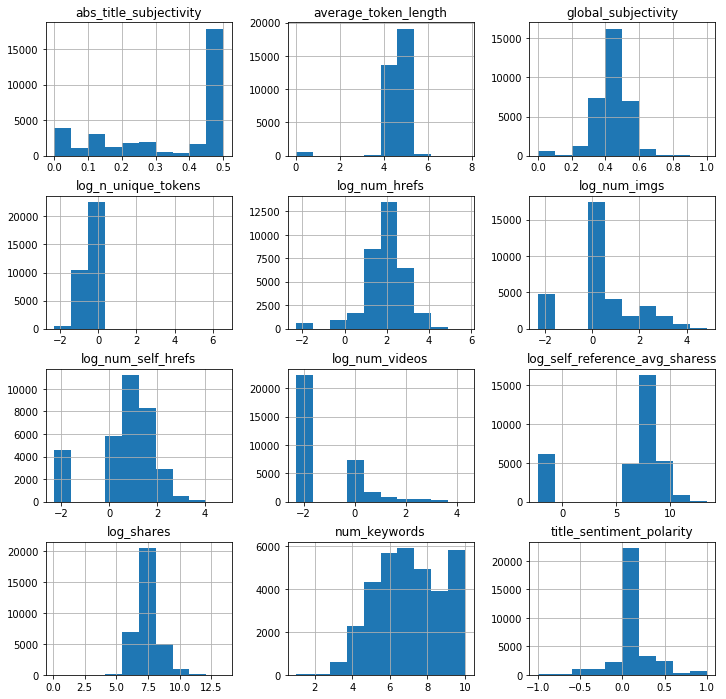

In [27]:
# Histogram for most interesting attributes 

df_clean.hist(figsize=(12,12))

<a id='VisualizeAttributes'></a>
### 05. Visualize Attributes
[Back to top](#BacktoTop)

#### Section Objective:
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

For this section, rather than going through and visualizing the attributes according to their corresponding aspect as we did in the **Simple Statistics** section, we decided to focus on the attributes that had obvious trends.

#### Day of the week:

The *Weekday* attribute was the most obvious trend that we noticed right away. The barplot below demonstrates that the number of articles published during the week is greater than the weekend. Drawing an anecdotal parallel to the typical workweek, this pattern seems to represent the productivity of white collar office workers where Monday starts off slower and picks up mid-week and eventually drops off by the weekend which might also be the case for publishers sucha as Mashable. This barplot doesn't give us an insight into the effect that publishing on a certain weekday has on the popularity of an article.

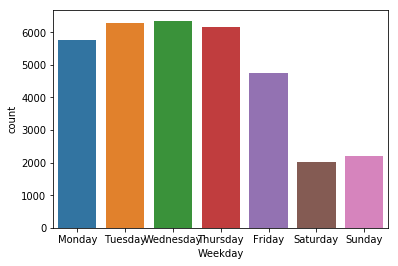

In [28]:
# Create countplot for each weekday
sns.countplot('Weekday', data = df)

The side by side plot below breaks out whether the article is popular (True - yellow bar) or not (False - blue bar) and assigns it to the corresponding weekday during which it was published.

The interesting trend that we noticed here is that the proportion of popular articles tends to be higher during the weekend than during the week. A possible explanation for this could be that a typical reader has more leisure time during the weekend to get through several articles and is more likely to share them on social media.

This difference in the ratio of popular to unpopular articles is important to understand as it could influence the predictive accuracy of a classification model.

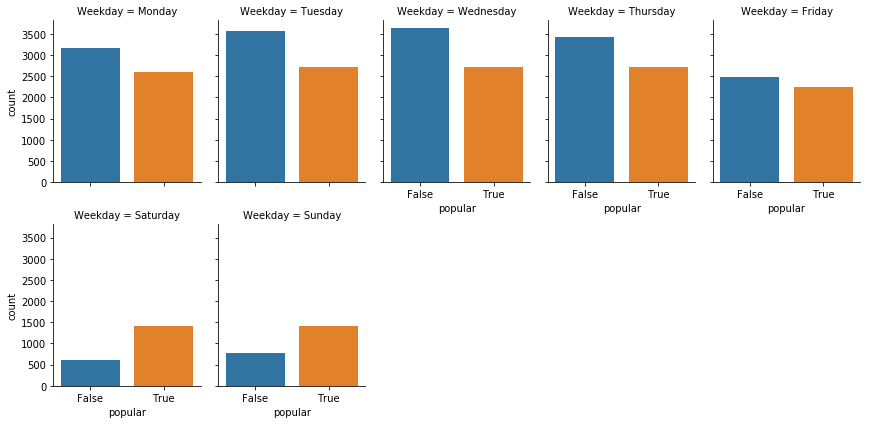

In [29]:
# Categorical plot splitting out the popular versus unpopular articles by weekday
sns.catplot('popular', col="Weekday", col_wrap = 5, data=df, kind="count", height=3, aspect=.8)

#### Data Channel:

The *Channel* attribute is another one that we immediately noticed a strong relationship. The horizontal barchart below shows a direct comparison in the number of articles published for each data channel. We can see that the *lifestyle* category has the lowest number of articles published for this data set while the *World* category has the highest number. 

Again, this chart only provides part of the picture. It would seem that publishers such as Mashable are catering to their readers with respect to the type of content they provide. For this reason we need to take a closer look at what proportion of articles are considered popular within each channel.

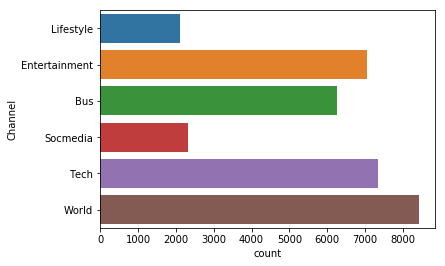

In [30]:
# Create countplot for each data channel
sns.countplot(y = 'Channel', data = df)

The plot below highlights some interesting differences in the ratio of popular articles for each of data channels. Even though the *World* channel has the most articles published in this data set, it also has the largest number of unpopular articles which is closely followed by the *Entertainment* channel. On the other hand, the *Tech*, *Socmedia*, and *Lifestyle* channels have higher proportions of popular articles. This might be a result of the readers having a greater personal interest, such as a hobby, in these channels making them more likely to share the article on social media. 

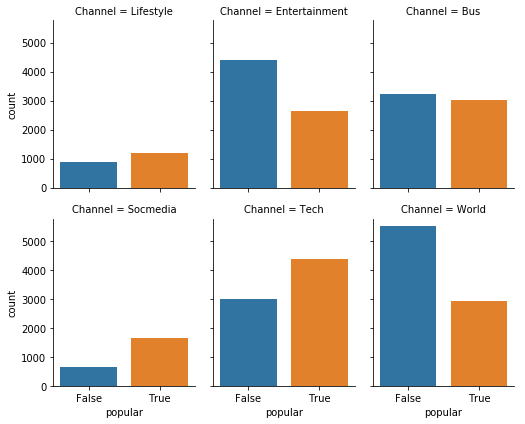

In [31]:
# Categorical plot splitting out the popular versus unpopular articles by data channel
sns.catplot('popular', col="Channel", col_wrap = 3, data=df, kind="count", height=3, aspect=.8)

#### Digital Media:

We all often hear the phrase "a picture says a thousand words" so it would be interesting to see whether that holds true for this data set. Since we already examined the distribution for the number of images (*num_imgs*) and videos (*num_videos*) per article in the **Summary Statistics** section, we wanted to tie in the *channel* attribute discussed above.

The first violin plot below shows the log transformed number of images categorized by the data channel and with the distribution color coded by whether the article is popular or not. It seems that most of the channels are trimodal with the exception of the business channel. Comparing the distributions of the popular versus unpopular articles, there doesn't seem to be any obvious deviations which suggests that this attribute might not have a strong influence on the popularity. 

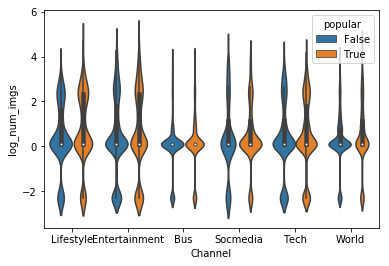

In [32]:
# Violin plot of popular versus unpopular articles measured by log_num_images categorized by data channel
sns.violinplot(x = "Channel", y = "log_num_imgs", hue = "popular", data = df)

The same violin plot was created for the log transformed numer of videos. The main difference here when comparing to the images plot above is that most of the channels have a weak bimodal distribution. The entertainment channel two strong peaks throughout it's distribution suggesting these articles typically have more videos included in comparison to other channels. Again, there is no obvious differentiation between the popular and unpopular articles.

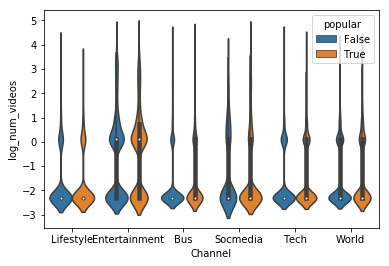

In [33]:
# Violin plot of popular versus unpopular articles measured by log_num_videos categorized by data channel
sns.violinplot(x = "Channel", y = "log_num_videos", hue = "popular", data = df)

#### Natural Language Processing Attributes:

The natural language processing attributes in this data set require some research to gain an understanding into what they represent. Prior to performing a lot of research into these attributes, we find some obvious trends that could possibly be explained without the domian knowledge.

The kernel density estimation plot below shows that the rate of positive words (left-hand side) is almost a mirror image of the rate of negative words (right-hand side) of an article. It would seem that including both of these attributes in a classification model could potentially lower the accuracy. It would be interesting to test this is theory when we build our model. 

Text(0.5,0,'Rate of negative words')

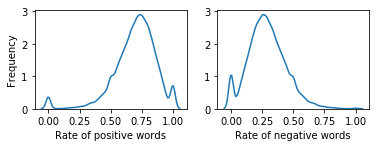

In [34]:
# kde plot for rate of positive words
plt.subplot(2, 2, 1)
sns.kdeplot(np.array(df['rate_positive_words']))
plt.xlabel('Rate of positive words')
plt.ylabel('Frequency')

# kde plot for rate of negative words
plt.subplot(2, 2, 2)
sns.kdeplot(np.array(df['rate_negative_words']))
plt.xlabel('Rate of negative words')

#### Number of Words:
We wanted to understand if the number of words in an article, be it the title or the body, has an obvious relationship with how popular it is. 

First, we looked at the distribution of the number of words in the title (*n_tokens_title*). The plot below displays a normal distribution with the peak frequency right around the 10 word count mark.

(0, 20)

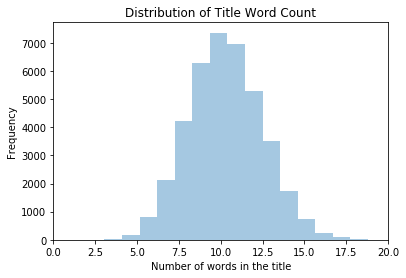

In [35]:
# distribution plot of title word count
ax = sns.distplot(dfCopy[' n_tokens_title'], bins = 20, kde = False)
plt.xlabel('Number of words in the title')
plt.ylabel('Frequency')
plt.title('Distribution of Title Word Count')
ax.set_xlim(0, 20)

As we discussed in the **Summary Statistics** section, the number of words in the body of the article (*n_tokens_content*) has a heavily right skewed distribution. It seems that the majority of the pulbished articles tend to stay within the 2,000 word count limit but surprsingly, there are plenty of articles that push that limit. By applying a log transformation to this attribute, we were able to improve this to a normal distribution with a small left tail. The diagram below shows the difference in the untransformed versus (left-hand side) the log transformed distribution (right-hand side).

By looking through these distributions, we are able to make a better judgement on which variables we will include in our classification model.

/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


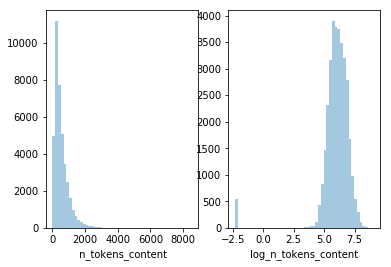

In [36]:
# side by side distribution plots of untransformed and log transformed article word count
fig, ax = plt.subplots(1,2)
sns.distplot(dfCopy[' n_tokens_content'], kde = False, ax = ax[0])
sns.distplot(df['log_n_tokens_content'], kde = False, ax = ax[1])
fig.show()

<a id='SimpleStatistics'></a>
### 06. Explore Joint Attributes
[Back to top](#BacktoTop)

#### Section Objective:
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

##### Pairplotting 

In the Scatterplot Matrix for 12 representative variables as shown below, the diagonal Axes are drawing a plot to show the univariate distribution of the data for the variable in that column (approximately normal distribution), and the grid of Axes for each variable in dataset will by shared in the y-axis across a single row and in the x-axis across a single column. The distributions are further grouped by "Weekday" and "Channel".

Need to mention that the pairplot for all the numercial variables in this dataset (not shown) helped us to identify the variables with multicollinearity (as mentioned above).  

The variables ('average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity', 'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',         'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess') will be used for further analysis. 

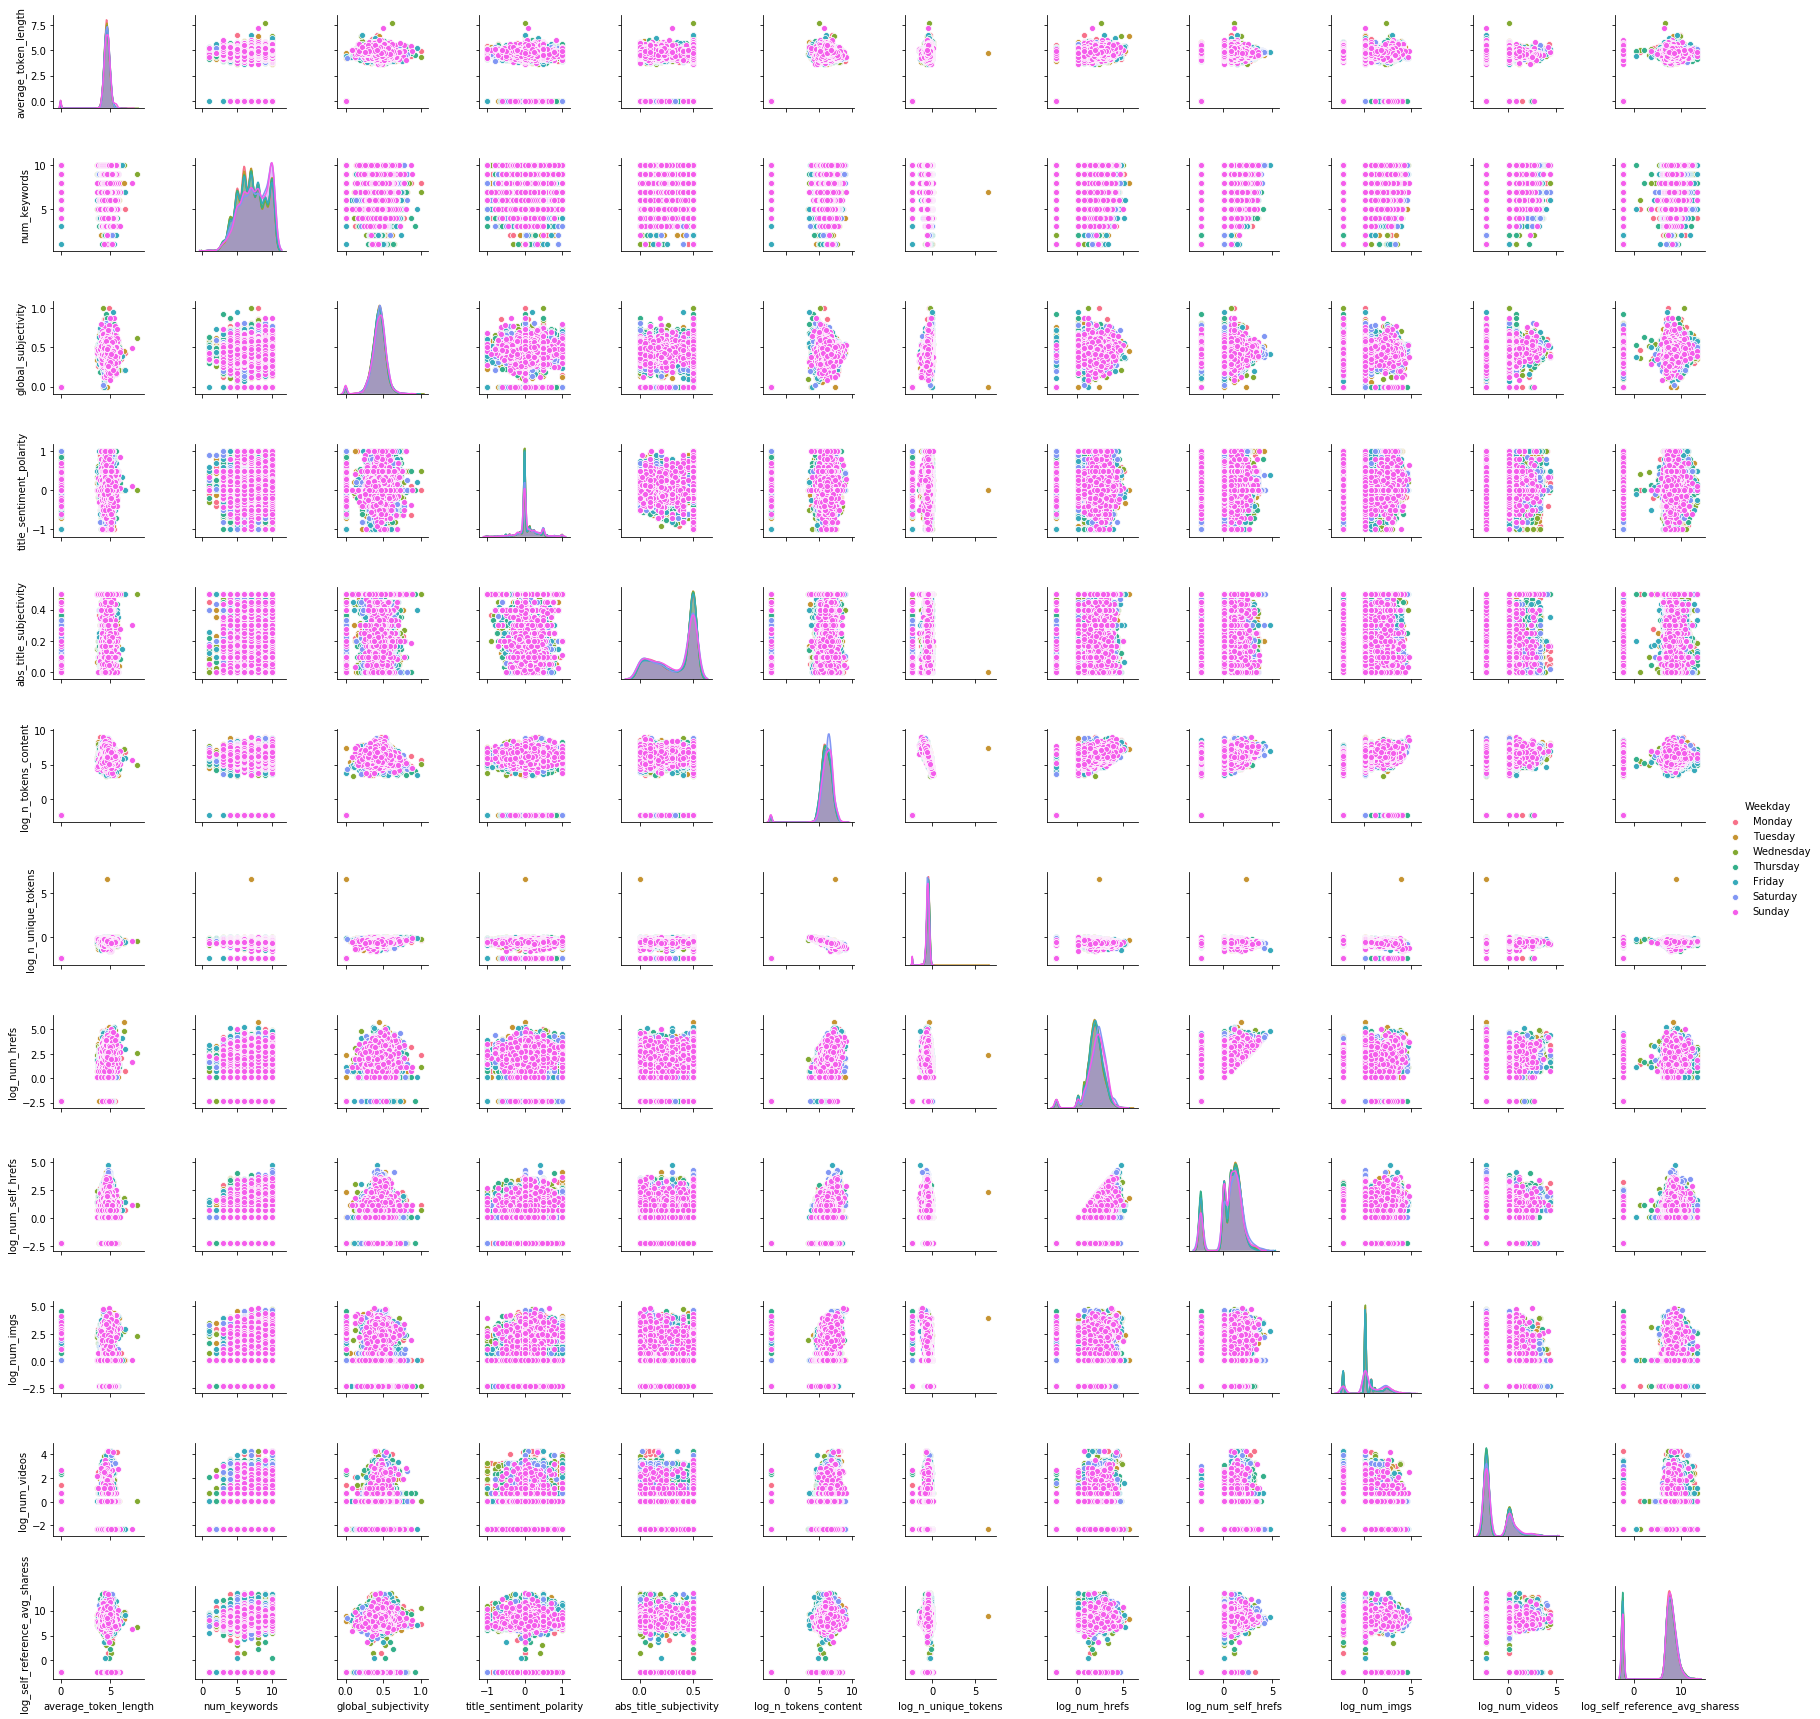

In [37]:
# Pairplot for log transformed variables, as grouped by Weekday

sns.pairplot(df, vars=['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity', 'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue="Weekday", palette="husl", height=2)

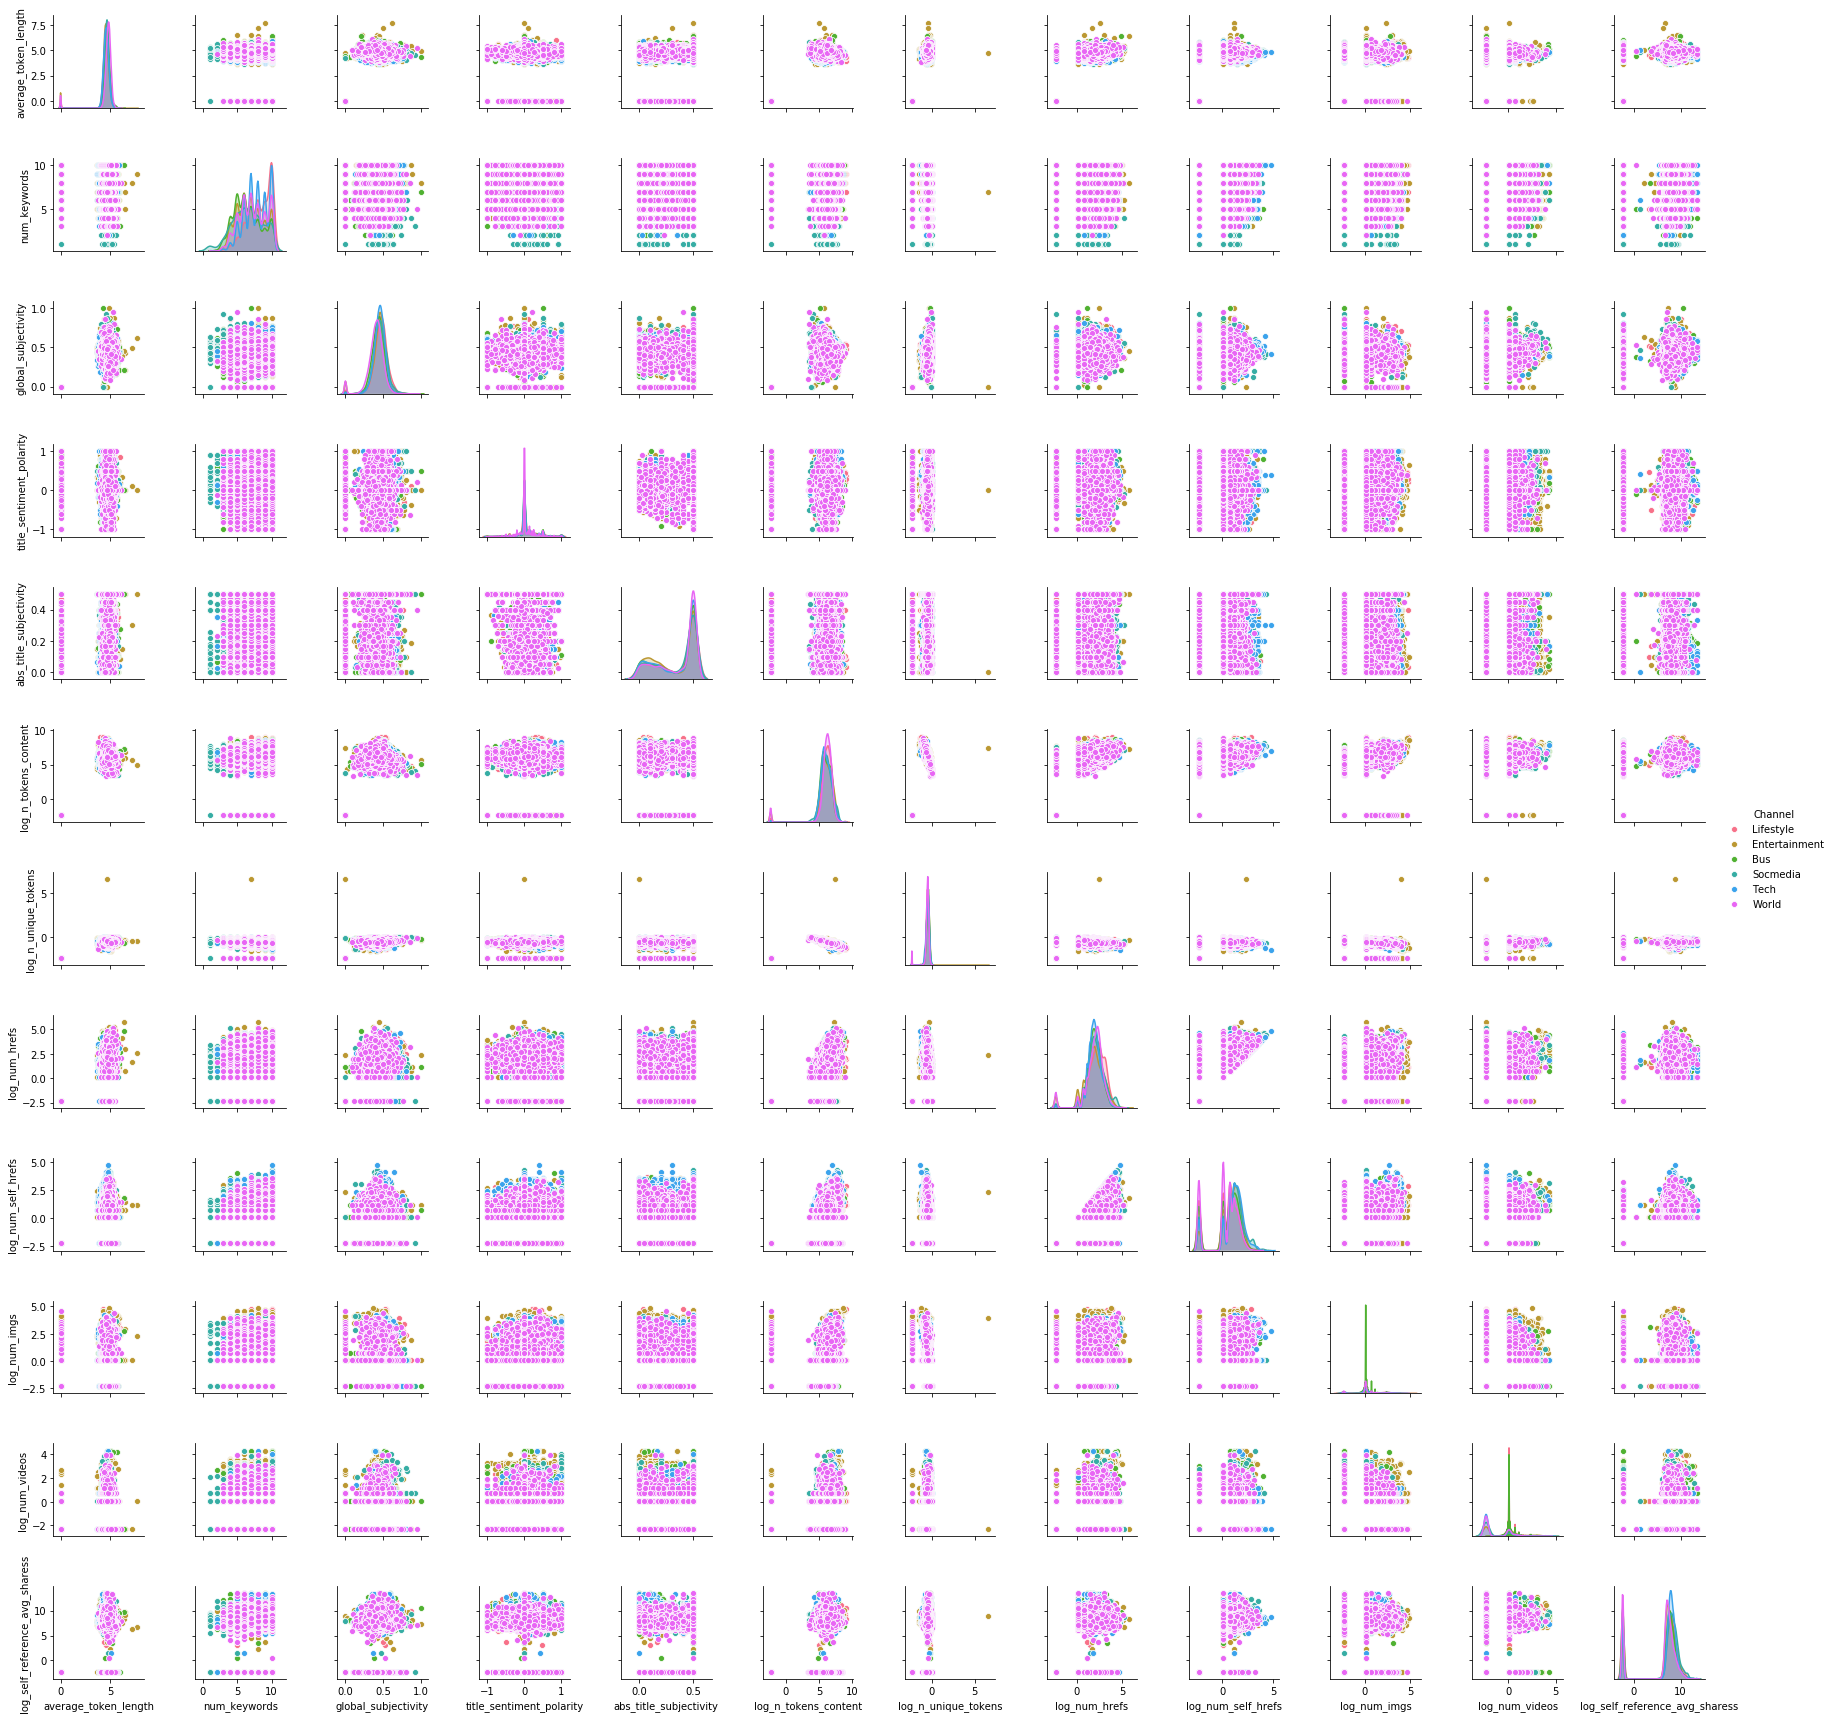

In [38]:
# Pairplot for log transformed variables, as grouped by Channel

sns.pairplot(df, vars=['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity','abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs','log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue="Channel", palette="husl", height=2)

<a id='SimpleStatistics'></a>
### 07. Explore Attributes and Class
[Back to top](#BacktoTop)

#### Section Objective:
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*


* We took natural log of these Words related features variables(non-stop words, non-stop unique tokens, unique tokens) to dampen the effect of extreme values, reduce the range of data, counter effects of outliers and make the distribution look like that of lognormal density. Even after taking log of the variable "log_n_non_stop_words", We can see that from the boxplot below, the number of non-stop words in almost all articles is around the same(just above 0 around .1 on log scale), thus has very non-normal distribution. Also we can see from the correlation table and the correlation heatmap of 'log_n_non_stop_words','log_n_non_stop_unique_tokens','log_n_unique_tokens' variables are highly correlated to each other (greater than 0.83), thus keeping all 3 varibles to build the multiple regression model is redundant. Note that they are not correlated with log_shares dependant variable having correlation coefficient close to Zero. the feature varible "log_n_unique_tokens" amoung these 3 varibles had close to normal distribution and it is somewhat correlated with log_shares, Thus we can drop these variables 'log_n_non_stop_words','log_n_non_stop_unique_tokens'and will only consider log_n_unique_tokens feature for model building.

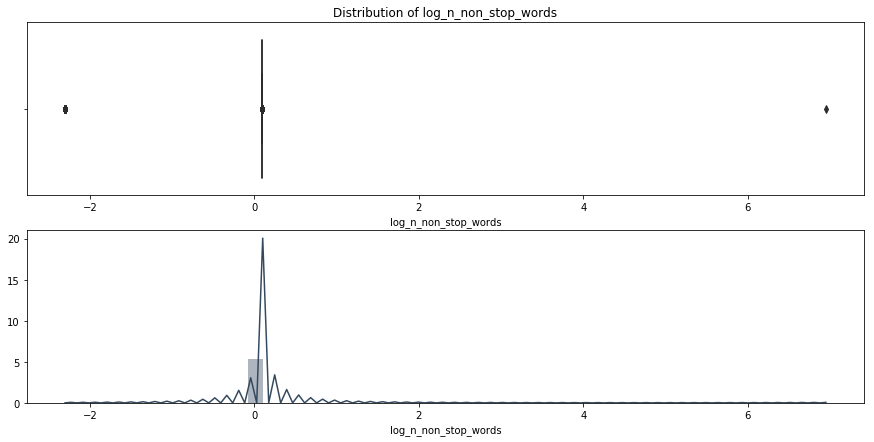

In [39]:
# sns.boxplot(x= df['log_n_non_stop_words'])
# Pairplot for log transformed variables, as grouped by Weekday

f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(df['log_n_non_stop_words'], ax=ax0, color="#34495e").set_title('Distribution of log_n_non_stop_words');
sns.distplot(df['log_n_non_stop_words'], ax=ax2, color="#34495e");

#### Correlation Heatmapping

The code below produces a correlation heatmap for the following four variables:
1. log_n_non_stop_words
2. log_n_non_stop_unique_tokens
3. log_n_unique_tokens
4. log_shares

                              log_n_non_stop_words  \
log_n_non_stop_words                      1.000000   
log_n_non_stop_unique_tokens              0.895739   
log_n_unique_tokens                       0.830301   
log_shares                               -0.017820   

                              log_n_non_stop_unique_tokens  \
log_n_non_stop_words                              0.895739   
log_n_non_stop_unique_tokens                      1.000000   
log_n_unique_tokens                               0.966863   
log_shares                                       -0.041660   

                              log_n_unique_tokens  log_shares  
log_n_non_stop_words                     0.830301   -0.017820  
log_n_non_stop_unique_tokens             0.966863   -0.041660  
log_n_unique_tokens                      1.000000   -0.049625  
log_shares                              -0.049625    1.000000  


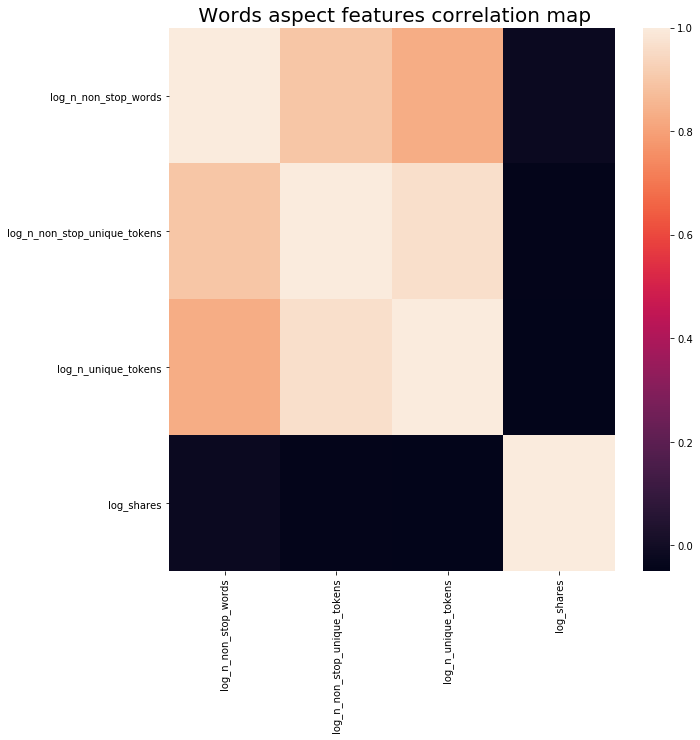

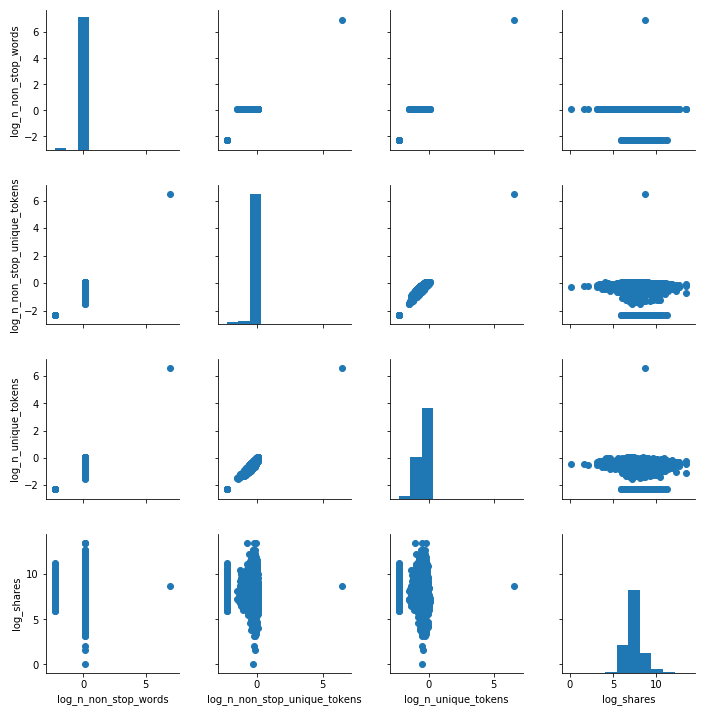

In [41]:
# words_vars=[' log_n_non_stop_words',' log_n_non_stop_unique_tokens',' log_n_unique_tokens', ' log_shares']
words_cols = df[['log_n_non_stop_words','log_n_non_stop_unique_tokens','log_n_unique_tokens', 'log_shares']].copy()
words_cols.describe()

print(words_cols.corr())
corrs = words_cols.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title(" Words aspect features correlation map", fontsize=20)

g = sns.PairGrid(words_cols)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

* The variables 19 to 27: ' kw_min_min',' kw_max_min',' kw_avg_min', ' kw_min_max',' kw_max_max', ' kw_avg_max',' kw_min_avg',' kw_max_avg', ' kw_avg_avg' which have information about the number of keywords. Here, these variables are average, minimum and maximum of the keywords. The average encompasses information from the minimum and maximum so, there is some collinearity between these variables. To reduce effects of multicollinearity, we will removed the variables with suffix “_min_” and “_max_” while keeping “_avg_”. Similarly, the variables 28,29,30 ' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess' are highly correlated to the corresponding variable “_avg_.”. Thus, we removed the variables with suffix “_min_” and “_max_” and will keeping ' self_reference_avg_sharess'. 

In [42]:
words_cols = dfCopy[[' kw_min_min',' kw_max_min',' kw_avg_min', ' kw_min_max',' kw_max_max', ' kw_avg_max',' kw_min_avg',' kw_max_avg', ' kw_avg_avg']].copy()
words_cols.describe()

print(words_cols.corr())

              kw_min_min   kw_max_min   kw_avg_min   kw_min_max   kw_max_max  \
 kw_min_min     1.000000     0.011534     0.112829    -0.062433    -0.857226   
 kw_max_min     0.011534     1.000000     0.940529    -0.036475    -0.005425   
 kw_avg_min     0.112829     0.940529     1.000000    -0.062958    -0.106933   
 kw_min_max    -0.062433    -0.036475    -0.062958     1.000000     0.065866   
 kw_max_max    -0.857226    -0.005425    -0.106933     0.065866     1.000000   
 kw_avg_max    -0.502719    -0.034936    -0.129136     0.411493     0.563353   
 kw_min_avg    -0.137094     0.007079    -0.021295     0.353099     0.158727   
 kw_max_avg    -0.073563     0.590468     0.545686     0.028394     0.092658   
 kw_avg_avg    -0.184018     0.411261     0.384317     0.172242     0.226998   

              kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  
 kw_min_min    -0.502719    -0.137094    -0.073563    -0.184018  
 kw_max_min    -0.034936     0.007079     0.590468     0.411261  
 

                              self_reference_min_shares  \
 self_reference_min_shares                     1.000000   
 self_reference_max_shares                     0.480476   
 self_reference_avg_sharess                    0.818907   

                              self_reference_max_shares  \
 self_reference_min_shares                     0.480476   
 self_reference_max_shares                     1.000000   
 self_reference_avg_sharess                    0.853480   

                              self_reference_avg_sharess  
 self_reference_min_shares                      0.818907  
 self_reference_max_shares                      0.853480  
 self_reference_avg_sharess                     1.000000  


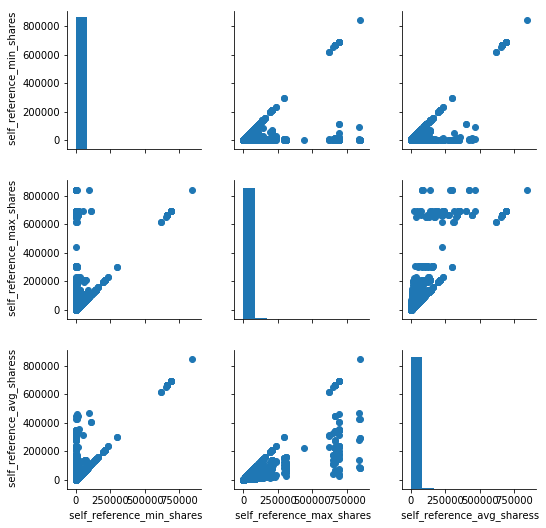

In [43]:
words_cols = dfCopy[[' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess']].copy()
words_cols.describe()

print(words_cols.corr())
g = sns.PairGrid(words_cols)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

* The variables 50 to 55: ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity' which have information about the polarity of positive keywords and negative keyword. Here, these variables are average, minimum and maximum of the keyword polarity. The average encompasses information from the minimum and maximum so, there is some collinearity between these variables. Thus we might consider about keeping only the variables with “_avg_.” suffix in it. 

                         avg_positive_polarity   min_positive_polarity  \
 avg_positive_polarity                1.000000                0.456973   
 min_positive_polarity                0.456973                1.000000   
 max_positive_polarity                0.703558                0.009600   
 avg_negative_polarity               -0.275705               -0.063571   
 min_negative_polarity               -0.232209                0.091270   
 max_negative_polarity               -0.139768               -0.183997   

                         max_positive_polarity   avg_negative_polarity  \
 avg_positive_polarity                0.703558               -0.275705   
 min_positive_polarity                0.009600               -0.063571   
 max_positive_polarity                1.000000               -0.268784   
 avg_negative_polarity               -0.268784                1.000000   
 min_negative_polarity               -0.360871                0.748896   
 max_negative_polarity               

Text(0.5,1,' Words aspect features correlation map')

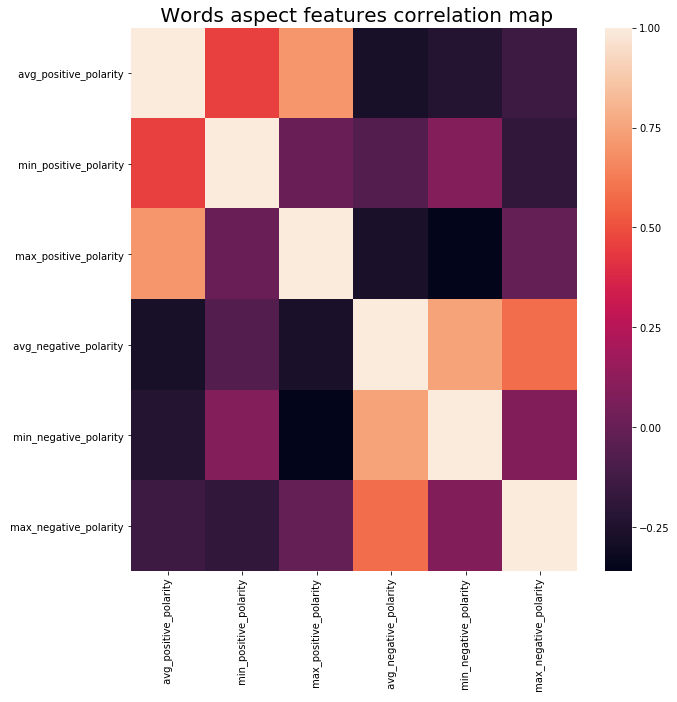

In [44]:
words_cols = dfCopy[[' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity']].copy()

print(words_cols.corr())

corrs = words_cols.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title(" Words aspect features correlation map", fontsize=20)


<a id='NewFeatures'></a>
### 08. New Features
[Back to top](#BacktoTop)

#### Section Objective:
Are there other features that could be added to the data or created from existing features? Which ones?

##### Suggested additions to the dataset
1. Break down the number of shares per social media channel
    * This would be intersting because it would allow for analysis to be perfomred to see if an article will be popular on each social media channel. Knowing how the attributes of an article will affect its popularity one each social media platform would allow the publisher to tailor article to the desired platform or even creation social media channel specifc variation of an article to increase pupularity on each channel.
2. Capture the number of hashtags applied to the article
    * Hashtags play a large role in making a topic trend on social media and getting something like an article to go viral. It would make sense to   capture information about hashtags in the dataset to see if they 
3. Introduction of time series
    * Capturing the number of shares an article is reciveing of a set of time intervals would allow publishers to see trends and set benchmarks for pupularity of an article. If a pubisher were ablt to see that an article has only gained so much attention at regular intervals it would be helpful for them to know if they need to introduce another article around that same subject or category or if the article is still gaining traction to let it continue to grow before introducing more articles that might impact the popularity of the first.
4. To analyze and check articles published by other publishers besides Mashable
5. To analyze and classfiy traditional articles rahter than only from Mashable
6. Make better article assesment methods, such as contentlike trend analysis
7. Integrate source information, potential reach, and possible competition for attention


<a id='ExceptionalWork'></a>

### 09. Exceptional Work

[Back to top](#BacktoTop)

#### Section Objective:
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

#### Heatmap 

Heatmap displays numeric tabular data where the cells are colored depending upon the contained value. 

##### Findings from Heatmap
From the color scales, some positively correlated variables (e.g. 'log_n_unique_tokens' and'log_n_non_stop_unique_tokens') are shown in purple, while the negatively correlated variables are shown in blue (e.g. 'kw_avg_max' and log_kw_min_min').

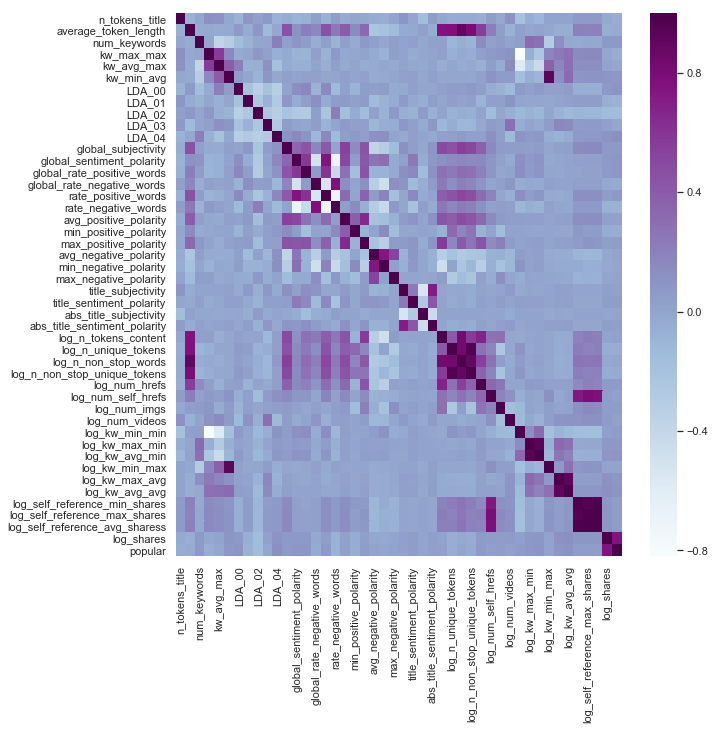

In [45]:
# Plot the correlation matrix using seaborn

sns.set(style="darkgrid") # one of the many styles to plot using
df_heatmap = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="BuPu")

#### Cluster Map

Compared to the heatmap as shown above, clustermap is to plot a matrix using hierachical clustering to arrange the rows and columns. Here, the positive correaltion relationship is shown in green, while the negative correaltion relationshio is shown in blue. The close varaibles can be clustered together. 

##### Findings from Cluster Map
Some examples of close variable that could be clustered are:
1. global_sentiment_polarity and global_rate_positive_words.
2. avg_negative_polarity and max_negative_polarity
3. avg_postive_polarity and max_positive_polarity

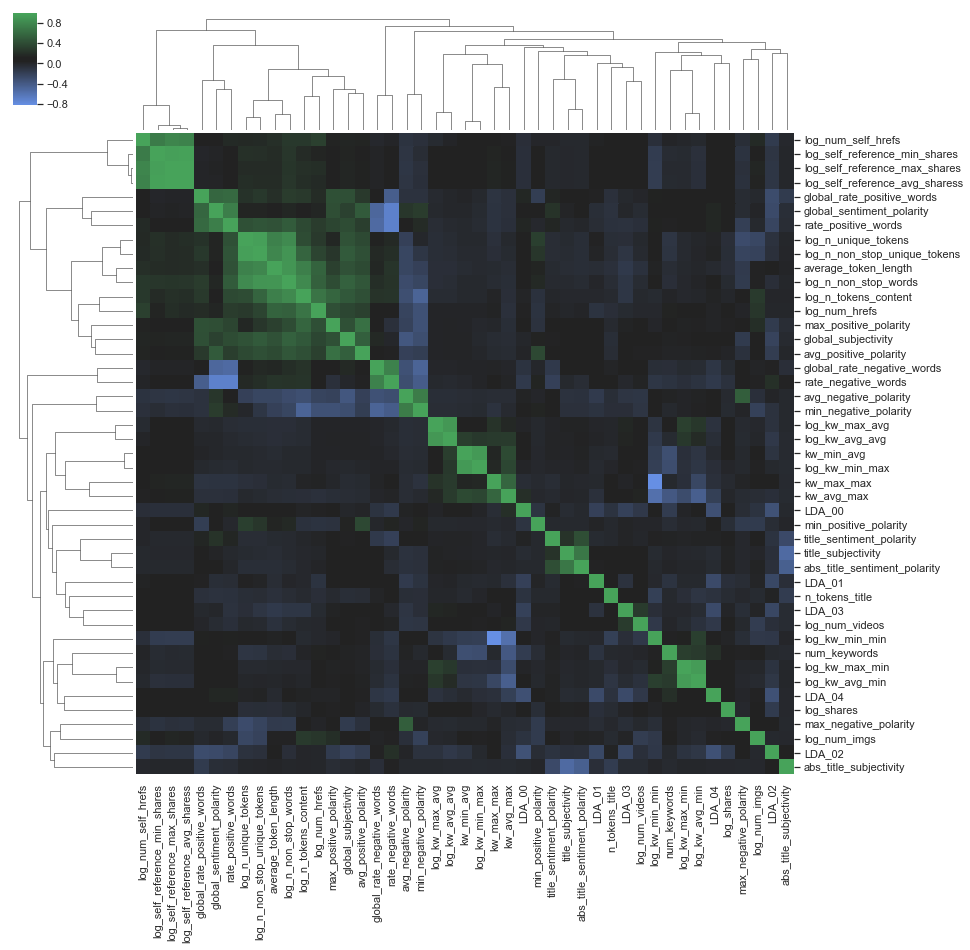

In [46]:
# Clustermap is to plot a matrix using hierachical clustering to arrange the rows and columns.

numeric = [c for i,c in enumerate(df.columns) if df.dtypes[i] in [np.float64, np.int64]]
len(numeric)

cmap = sns.diverging_palette(255, 133, l=60, n=7, as_cmap=True, center="dark")
sns.clustermap(df[numeric].corr(), figsize=(14, 14), cmap=cmap);

#### Dimension Reduction Techniques 

##### Principal component analysis (PCA) 

As shown in the code below we did go through the process of performing PCA, however in the details shown below we can see that, PCA is not optimal for classification, especially for this large dataset having multiple classes.


In [47]:
# Cut log_shares into 2 groups (0, 1)

df_cut = df['log_shares_cut'] = pd.qcut(df['log_shares'], 2, labels = ('unpopular', 'popular'))

In [48]:
# Get 'log_shares' position
df.columns.get_loc('log_shares')

46

In [49]:
# Drop the above column
df.drop(df.columns[46], axis=1, inplace=True)

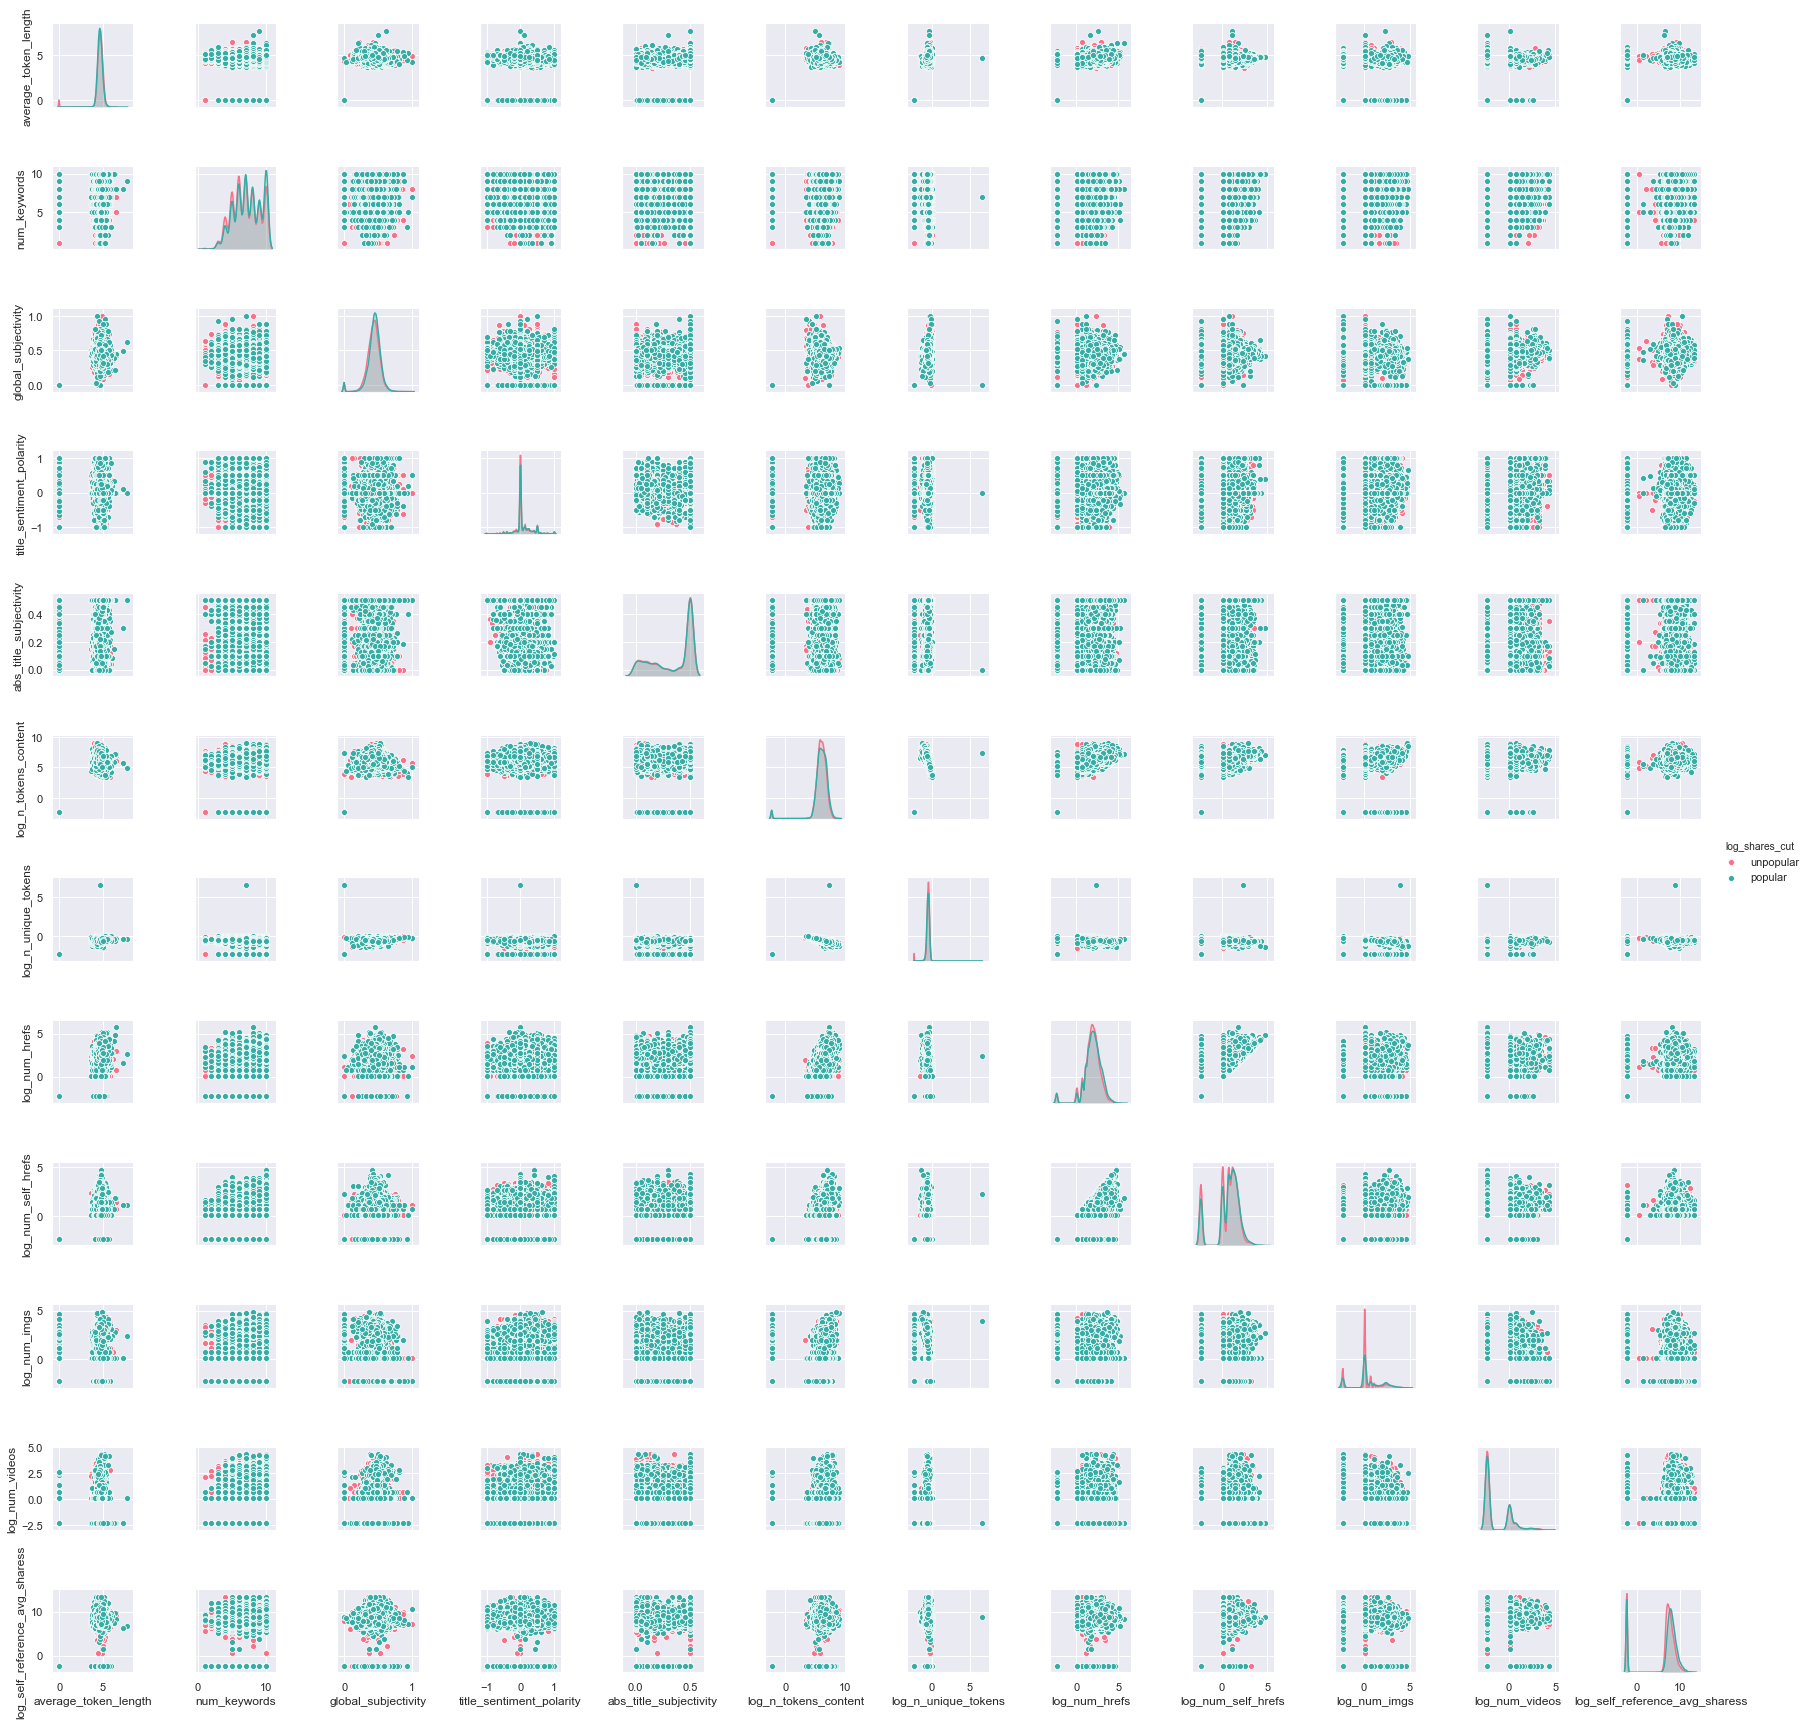

In [50]:
# Samples for pairplot as group by the log_share_cut (0, 1)

sns.pairplot(df, vars = ['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
                       'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue = "log_shares_cut", palette="husl", height=2)

In [51]:
# Pick log transformed variables, transform and prepare for PCA 

from sklearn.preprocessing import StandardScaler
features = ['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
            'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
            'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['log_shares_cut']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [52]:
# Try PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [53]:
# Concat two component and prepare to plot

finalDf = pd.concat([principalDf, df[['log_shares_cut']]], axis = 1)
finalDf.head(10)

,principal component 1,principal component 2,log_shares_cut
0,-1.684700,-1.913425,unpopular
1,1.010819,2.862638,unpopular
2,0.416002,0.751330,popular
3,1.469637,2.239519,unpopular
4,-0.155334,1.734597,unpopular
5,-0.315230,-0.641018,unpopular
6,-1.780766,-1.912482,unpopular
7,0.893568,2.773147,unpopular
8,0.090845,-1.091994,popular
9,0.644319,2.873947,unpopular


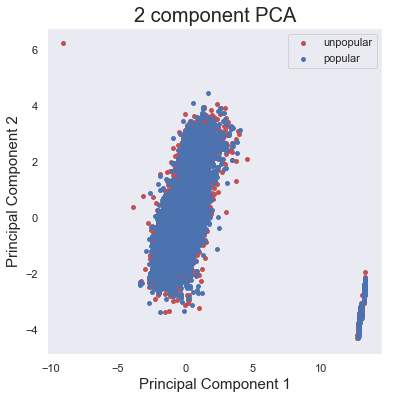

In [54]:
# Plot 2 component PCA

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
log_shares_cuts = ['unpopular', 'popular'] # 0 = unpopular, 1 = popular
colors = ['r', 'b']

for log_shares_cut, color in zip(log_shares_cuts, colors):
    indicesToKeep = finalDf['log_shares_cut'] == log_shares_cut
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
ax.legend(log_shares_cuts)
ax.grid()

#### Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is the alternative method to find the boundaries around clusters of classes in better separability. We will attempt this in Lab 2

### Resource and Reference


1. Online News Popularity Dataset from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

2. Kelwin Fernandes, Pedro Vinagre, and Paulo Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News (https://pdfs.semanticscholar.org/ad7f/3da7a5d6a1e18cc5a176f18f52687b912fea.pdf)
